In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet, ElasticNetCV, MultiTaskElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [7]:
acled_df = pd.read_csv('../data/acled/south_sudan.csv') 
# acled_df = acled_df.drop(['SOURCE', 'SOURCE_SCALE', 'TAGS', 'EVENT_DATE', 'YEAR', 'GEO_PRECISION'], axis=1)

data = acled_df
X = data.drop('FATALITIES', axis=1)
# vector = np.array(data['FATALITIES'])
# y = np.where(vector > 0, np.log(vector), 0)
y = data['FATALITIES']

In [2]:
ucdp_df = pd.read_csv("../data/ucdp/south_sudan.csv").drop('low', axis=1) ## (974, 48)

# unclear if we should keep: 'dyad_dset_id', 'dyad_new_id', 'dyad_name', 
# removed, additionally: 'adm_1', 'adm_2', 'relid', 'active_year', 'country', 'country_id', 'region', 'date_prec', 

# columns_to_keep = ['year', 'best', 'conflict_new_id', 'conflict_name', 'where_prec', 'where_coordinates', 
#                    'where_description', 'latitude', 'longitude', 'geom_wkt', 'priogrid_gid', 'date_start']

columns_to_keep = ['latitude', 'longitude', 'best', 'date_start']
ucdp_df = ucdp_df[columns_to_keep]
# ucdp_df.dropna(inplace=True)
ucdp_df.sort_values(by='date_start', inplace=True)

data = ucdp_df
X = data.drop('best', axis=1) # 839 x 19
y = data['best']

In [3]:
## this method leads to feature explosion (~ 2800 features from 19 original columns)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = preprocessor.fit_transform(X) # (839, 2868)

In [4]:
print(X.shape)


(974, 659)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth=3, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)



-0.020848327414001222

In [6]:
y_pred = model.predict(X_test)
yp=y_pred

mse = mean_squared_error(y_test, yp)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1858.5920368566321


In [7]:
true_arr = y_test.sort_index().values
pred_arr = pd.Series(yp).sort_index().values
mean_squared_error(true_arr, pred_arr)

1853.5689488421403

In [8]:
true_sorted = y_test.sort_index()
pred_sorted = pd.Series(yp).sort_index()

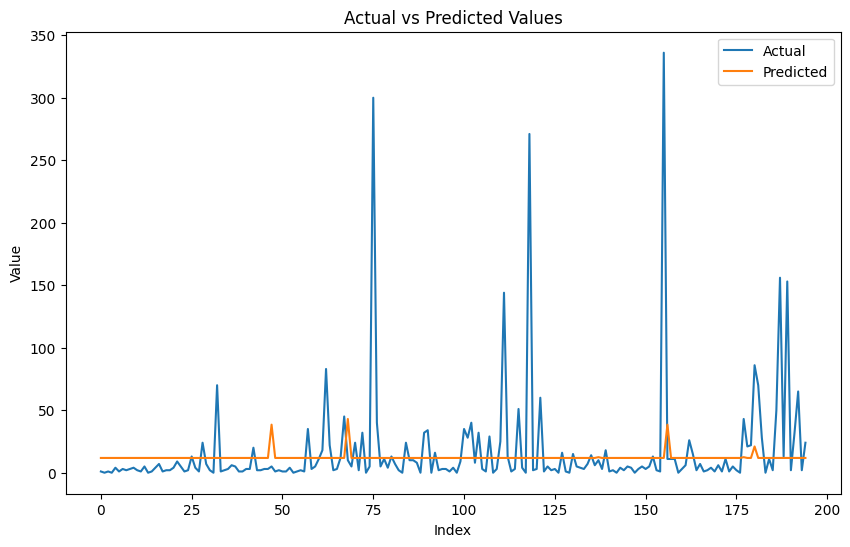

In [9]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(true_arr, label='Actual')
plt.plot(pred_arr, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()